<a href="https://colab.research.google.com/github/eduardodacostasoares/Data_Science/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LINEAR REGRESSION (BOSTON)**#

Comparing Linear Regression, the LASSO and the Ridge.

####**Database:** Boston housing dataset####

https://www.kaggle.com/schirmerchad/bostonhoustingmlnd/version/1

ERROR: unknown command "upgrade"


In [11]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import numpy as np
import matplotlib.pyplot as plt


***PolynomialFeatures()***: Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.

In [12]:
boston = load_boston()
X = boston.data
print("Number of attributes (originally):")
print(X.shape)

X = MinMaxScaler().fit_transform(boston.data)
X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

print("Polynomial Features (redundants attributes):")
print(X.shape)

y = boston.target

Number of attributes (originally):
(506, 13)
Polynomial Features (redundants attributes):
(506, 104)


##**Steps to induct the model:**##

1.   **To instance the model**: LinearRegression
2.   **To train the model**: fit()

The *score()* method returns the prediction coefficient R².

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Linear Regression (with redundants attributes):")
print("Train base accuracy: {:.2f}".format(lr.score(X_train, y_train)))
print("Test base accuracy: {:.2f}".format(lr.score(X_test, y_test)))

Linear Regression (with redundants attributes):
Train base accuracy: 0.95
Test base accuracy: 0.61


**RIDGE**

- Is a linear regression that adds a regularization penalty to the loss function during training (also called "*L2 regularization*").

- Attribute "*alpha*" indicates the "regularization strength" (must be a positive float). Larger values specify a strtonger regularization. 

In [17]:
ridge = Ridge().fit(X_train, y_train)
print("Ridge (Alpha) = 1.0")
print("Train base accuracy: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test base accuracy: {:.2f}\n".format(ridge.score(X_test, y_test)))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Ridge (Alpha) = 10")
print("Train base accuracy: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test base accuracy: {:.2f}\n".format(ridge.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Ridge (Alpha) = 0.1")
print("Train base accuracy: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test base accuracy: {:.2f}".format(ridge.score(X_test, y_test)))

Ridge (Alpha) = 1.0
Train base accuracy: 0.89
Test base accuracy: 0.75

Ridge (Alpha) = 10
Train base accuracy: 0.89
Test base accuracy: 0.75

Ridge (Alpha) = 0.1
Train base accuracy: 0.89
Test base accuracy: 0.75


**LASSO**

- Is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent (also called "*L1 regularization*").

- Attribute "*alpha*" indicates the "regularization strength" (must be a positive float). Larger values specify a strtonger regularization. 

In [18]:
lasso = Lasso().fit(X_train, y_train)
print("Lasso (Alpha) = 1.0")
print("Train base accuracy: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test base accuracy: {:.2f}".format(lasso.score(X_test, y_test)))
print("Used attributes: {}\n".format(np.sum(lasso.coef_ != 0)))

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Lasso (Alpha) = 0.01")
print("Train base accuracy: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test base accuracy: {:.2f}\n".format(lasso001.score(X_test, y_test)))
print("Used attributes: {}\n".format(np.sum(lasso001.coef_ != 0)))

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Lasso (Alpha) = 0.0001")
print("Train base accuracy: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test base accuracy: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Used attributes: {}\n".format(np.sum(lasso00001.coef_ != 0)))

Lasso (Alpha) = 1.0
Train base accuracy: 0.29
Test base accuracy: 0.21
Used attributes: 4

Lasso (Alpha) = 0.01
Train base accuracy: 0.90
Test base accuracy: 0.77

Used attributes: 33

Lasso (Alpha) = 0.0001
Train base accuracy: 0.95
Test base accuracy: 0.64
Used attributes: 96



##**RIDGE X LASSO**##

Text(0, 0.5, 'Magnitude')

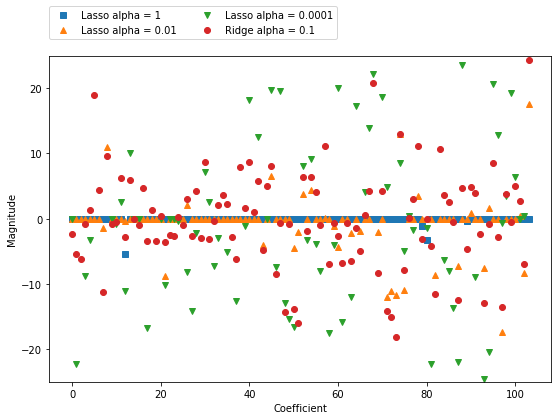

In [19]:
plt.figure(figsize=(9,6))
plt.plot(lasso.coef_, 's', label="Lasso alpha = 1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha = 0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha = 0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha = 0.1")

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25,25)
plt.xlabel("Coefficient")
plt.ylabel("Magnitude")